# Housing prices

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

## Load Data

In [3]:
housing = datasets.load_boston()

In [4]:
x, y = shuffle(housing.data, housing.target, random_state=7)

## Train test split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42 )

## Decision Tree

In [9]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

## Adaboost

In [14]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400)
ab_regressor.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=None)

In [16]:
y_pred_ab = ab_regressor.predict(x_test)
y_pred_dt = dt_regressor.predict(x_test)

## Evaluation

In [18]:
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)

In [23]:
print 'Decision Tree performance'
print ' Mean squared error =', round(mse, 2)
print ' Explained variance score =', round(evs, 2)

Decision Tree performance
 Mean squared error = 7.69
 Explained variance score = 0.88


In [24]:
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print 'Adaboost performance'
print ' Mean squared error =', round(mse, 2)
print ' Explained variance score =', round(evs, 2)

Adaboost performance
 Mean squared error = 7.69
 Explained variance score = 0.88


## Feature importance

In [26]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

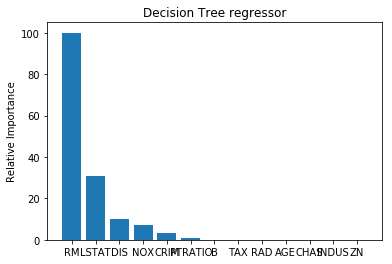

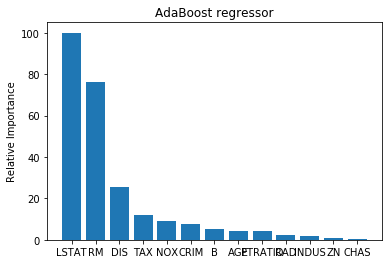

In [29]:
plot_feature_importances(dt_regressor.feature_importances_,
            'Decision Tree regressor', housing.feature_names)
plot_feature_importances(ab_regressor.feature_importances_,
            'AdaBoost regressor', housing.feature_names)